<a href="https://colab.research.google.com/github/AdilPasha2/Oasis-Infobyte/blob/main/Retail_Sales_Data_level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/retail_sales_dataset.csv")

In [5]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Descriptive Statistics

In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
df.mode().iloc[0]

,0
Transaction ID,1
Date,2023-05-16
Customer ID,CUST001
Gender,Female
Age,43.0
Product Category,Clothing
Quantity,4.0
Price per Unit,50.0
Total Amount,50.0


In [10]:
num_df=df.select_dtypes(include=['int64','float64'])
std_dev=num_df.std()
print(std_dev)

Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


Time Series Analysis

In [11]:
df.drop_duplicates()
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [12]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [13]:
df = df.sort_values(by='Date')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25
...,...,...,...,...,...,...,...,...,...
232,233,2023-12-29,CUST233,Female,51,Beauty,2,300,600
804,805,2023-12-29,CUST805,Female,30,Beauty,3,500,1500
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25,50
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500


In [14]:
import seaborn as sns

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

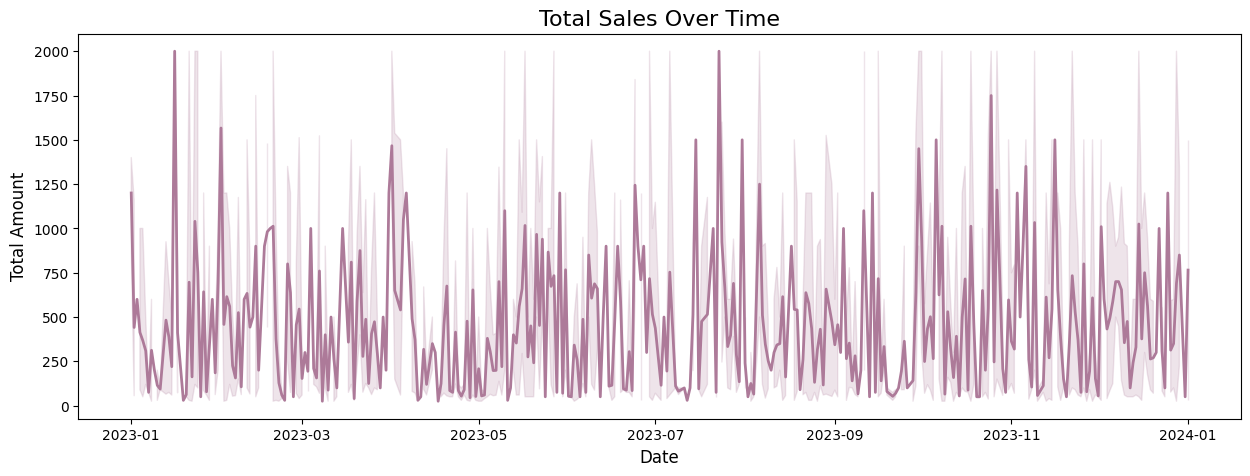

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Total Amount',data=df, color='#AD7A99', linewidth=2)
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.show()

Customer and Product Analysis

In [17]:
#df= df.drop(['month','year','monthly_sales'],axis=1)
#df.head()
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [18]:
age_bin = [10, 20, 30, 40, 50, 60]
age_labels = ['10-19','20-29','30-39','40-49','50-59']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bin, labels=age_labels, right=True)

In [19]:
Total_amt_byage = df.groupby('Age_Group')['Total Amount'].sum()
Total_amt_byage

<ipython-input-19-4d8689370655>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_amt_byage = df.groupby('Age_Group')['Total Amount'].sum()


,Total Amount
Age_Group,
10-19,34730
20-29,98215
30-39,95950
40-49,93795
50-59,100085


In [20]:
groupe_data = df.groupby(['Age_Group','Product Category'])['Total Amount'].sum().reset_index()
groupe_data

<ipython-input-20-51386b782d10>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupe_data = df.groupby(['Age_Group','Product Category'])['Total Amount'].sum().reset_index()


,Age_Group,Product Category,Total Amount
0,10-19,Beauty,11850
1,10-19,Clothing,7255
2,10-19,Electronics,15625
3,20-29,Beauty,33860
4,20-29,Clothing,41415
5,20-29,Electronics,22940
6,30-39,Beauty,32825
7,30-39,Clothing,31250
8,30-39,Electronics,31875
9,40-49,Beauty,33095


Bar Plot


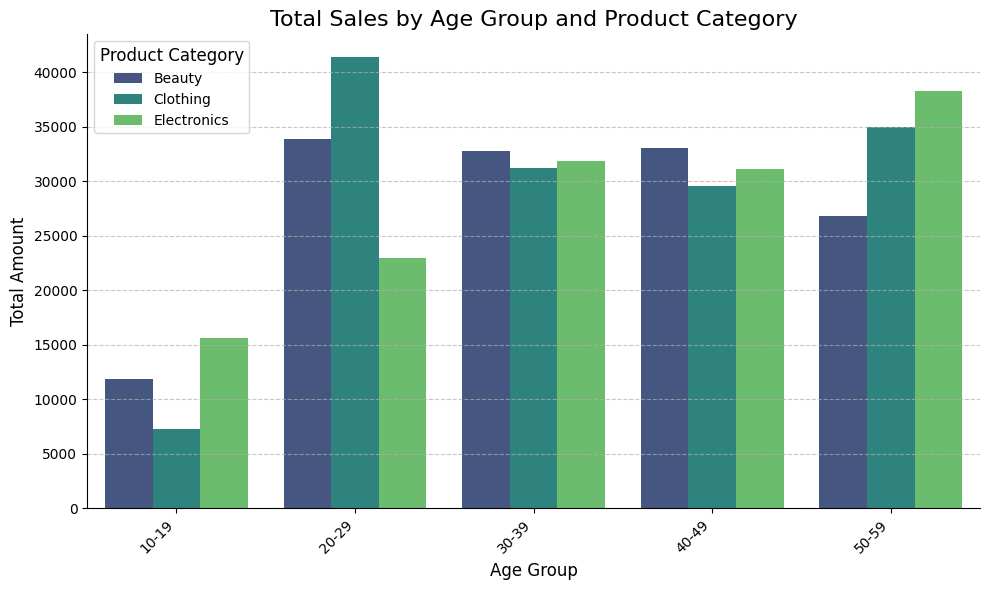

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Total Amount', hue='Product Category', data=groupe_data, palette='viridis')
plt.title('Total Sales by Age Group and Product Category', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category', title_fontsize='12', fontsize='10')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

Gender Spend analysis

In [22]:
Gender_spend_analysis = df.groupby('Gender')['Total Amount'].sum().reset_index()
Gender_spend_analysis

,Gender,Total Amount
0,Female,232840
1,Male,223160


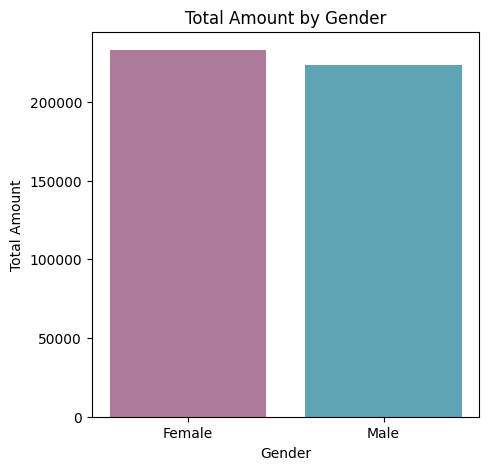

In [23]:
plt.figure(figsize=(5,5))
plt.bar(Gender_spend_analysis['Gender'],Gender_spend_analysis['Total Amount'],color=["#AD7A99","#5EA4B5"])
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Amount by Gender')
plt.show()

In [24]:
Gender_group = df.groupby(['Gender','Product Category'])['Total Amount'].sum().reset_index()
Gender_group

,Gender,Product Category,Total Amount
0,Female,Beauty,74830
1,Female,Clothing,81275
2,Female,Electronics,76735
3,Male,Beauty,68685
4,Male,Clothing,74305
5,Male,Electronics,80170


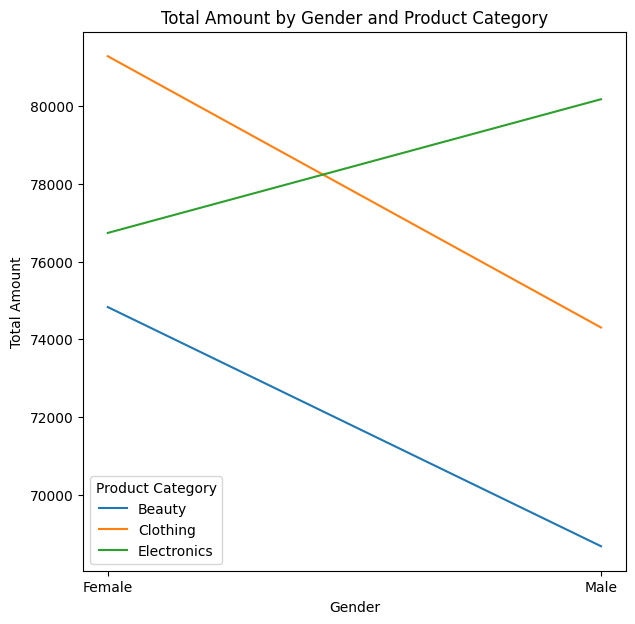

In [25]:
plt.figure(figsize=(7,7))
sns.lineplot(x="Gender", y="Total Amount", hue="Product Category", data=Gender_group)
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Total Amount by Gender and Product Category')
plt.show()

In [26]:
avg_spend_by_gender = df.groupby('Gender')['Total Amount'].mean().reset_index()
avg_spend_by_gender

,Gender,Total Amount
0,Female,456.549020
1,Male,455.428571


In [27]:
total_num = df.groupby('Product Category')['Quantity'].sum().reset_index()
total_num

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [28]:
print("Recommendations:")
print("1. Focus on the top-performing products to maximize revenue.")
print("2. Analyze sales during low-performing months to address seasonal dips.")
print("3. Consider demographic-specific promotions for targeted marketing.")
print("4. Expand product offerings in the most popular categories.")
print("5. Use customer purchase trends to improve inventory management.")

Recommendations:
1. Focus on the top-performing products to maximize revenue.
2. Analyze sales during low-performing months to address seasonal dips.
3. Consider demographic-specific promotions for targeted marketing.
4. Expand product offerings in the most popular categories.
5. Use customer purchase trends to improve inventory management.
